# import library packages 

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

# Load the dataset

In [2]:
data = pd.read_csv("vadodara_house_price_dataset_new.csv")
data.head()

,h_type,location,society,size,bathroom,balcony,total_sqft,yr_built,furniture,sale_type,...,college,hospital,population,railway,airport,on_road,air_quality,restaurant,park,price
0,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1550.0,2011.0,0,new,...,0,1,2,0,0,1,1,1,1,4361705
1,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1550.0,2012.0,1,new,...,0,1,2,0,0,1,1,1,1,5001905
2,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1860.0,2010.0,1,new,...,0,1,2,0,0,1,1,1,1,5588795
3,apartment,Maneja,Bakeri Swara,2 BHK,2,1,1015.0,2016.0,1,new,...,0,1,2,0,0,1,1,1,1,3184740
4,apartment,Maneja,Bakeri Swara,2 BHK,2,1,1210.0,2019.0,0,new,...,0,1,2,0,0,1,1,1,1,3498895


# Data Preprocessing

In [3]:
data = data.drop(['society', 'yr_built', 'furniture', 'sale_type', 'amenities', 'market', 'office', 'school', 'college', 'hospital', 'population', 'railway', 'airport', 'on_road', 'air_quality', 'restaurant', 'park'], axis=1)
data.head()

,h_type,location,size,bathroom,balcony,total_sqft,price
0,apartment,Maneja,3 BHK,3,1,1550.0,4361705
1,apartment,Maneja,3 BHK,3,1,1550.0,5001905
2,apartment,Maneja,3 BHK,3,1,1860.0,5588795
3,apartment,Maneja,2 BHK,2,1,1015.0,3184740
4,apartment,Maneja,2 BHK,2,1,1210.0,3498895


In [4]:
data.isnull().sum()

h_type        0
location      0
size          0
bathroom      0
balcony       0
total_sqft    0
price         0
dtype: int64

In [5]:
df = data.iloc[ : , :-1].values
df

array([['apartment', 'Maneja', '3 BHK', 3, 1, 1550.0],
       ['apartment', 'Maneja', '3 BHK', 3, 1, 1550.0],
       ['apartment', 'Maneja', '3 BHK', 3, 1, 1860.0],
       ...,
       ['apartment', 'Gotri', '3 BHK', 3, 3, 1550.0],
       ['apartment', 'Gotri', '3 BHK', 3, 2, 1750.0],
       ['apartment', 'Gotri', '2 BHK', 2, 3, 1200.0]], dtype=object)

# Label encoder(its conver the categorical to numerical)

In [6]:
label_encoder = LabelEncoder()

In [7]:
df[ : ,0] = label_encoder.fit_transform(df[ : ,0])
df

array([[0, 'Maneja', '3 BHK', 3, 1, 1550.0],
       [0, 'Maneja', '3 BHK', 3, 1, 1550.0],
       [0, 'Maneja', '3 BHK', 3, 1, 1860.0],
       ...,
       [0, 'Gotri', '3 BHK', 3, 3, 1550.0],
       [0, 'Gotri', '3 BHK', 3, 2, 1750.0],
       [0, 'Gotri', '2 BHK', 2, 3, 1200.0]], dtype=object)

In [8]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'apartment': 0,
 'duplex': 1,
 'pent house': 2,
 'tenament': 3,
 'triplex': 4,
 'villa': 5}

In [9]:
df[ : ,1] = label_encoder.fit_transform(df[ : ,1])
df

array([[0, 15, '3 BHK', 3, 1, 1550.0],
       [0, 15, '3 BHK', 3, 1, 1550.0],
       [0, 15, '3 BHK', 3, 1, 1860.0],
       ...,
       [0, 8, '3 BHK', 3, 3, 1550.0],
       [0, 8, '3 BHK', 3, 2, 1750.0],
       [0, 8, '2 BHK', 2, 3, 1200.0]], dtype=object)

In [10]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Ajwa Road': 0,
 'Akota': 1,
 'Alkapuri': 2,
 'Atladra': 3,
 'Bhayli': 4,
 'Chhani': 5,
 'Fatehgunj': 6,
 'Gorwa': 7,
 'Gotri': 8,
 'Harni': 9,
 'Karelibaug': 10,
 'Khodiyar Nagar': 11,
 'Laxmipura': 12,
 'Madhav Pura': 13,
 'Mandvi': 14,
 'Maneja': 15,
 'Manjalpur': 16,
 'Navapura': 17,
 'New Alkapuri': 18,
 'New Karelibaugh': 19,
 'New Sama': 20,
 'New VIP Road': 21,
 'Sama': 22,
 'Sayajipura': 23,
 'Soma Talav': 24,
 'Vasant Vihar': 25,
 'Vasna Road': 26,
 'Vasna-Bhayli Road': 27,
 'Waghodia Road': 28}

In [11]:
df[ : ,2] = label_encoder.fit_transform(df[ : ,2])
df

array([[0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1860.0],
       ...,
       [0, 8, 2, 3, 3, 1550.0],
       [0, 8, 2, 3, 2, 1750.0],
       [0, 8, 1, 2, 3, 1200.0]], dtype=object)

In [12]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'1 BHK': 0, '2 BHK': 1, '3 BHK': 2, '4 BHK': 3, '5 BHK': 4}

In [13]:
y = data.price.values
X = df

# Split the dataset 

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2)

In [15]:
standard_x = StandardScaler()

In [16]:
X_train = standard_x.fit_transform(X_train)
X_val = standard_x.transform(X_val)

In [17]:
print('Train_Shape: ',X_train.shape)
print("\nX_train:")
X_train

Train_Shape:  (272, 6)

X_train:


array([[ 3.58747505,  0.31789938,  1.4260059 ,  0.36590733, -0.64191645,
         0.71987611],
       [-0.42813488,  1.39204385,  0.28520118,  0.36590733, -0.64191645,
         0.85167963],
       [ 0.3749871 ,  1.60687275,  0.28520118,  0.36590733,  1.47446263,
         0.16491391],
       ...,
       [-0.42813488, -0.43400176,  0.28520118,  0.36590733,  0.41627309,
        -0.1125672 ],
       [-0.42813488, -0.43400176, -0.85560354, -0.68174312, -0.64191645,
        -0.7424493 ],
       [-0.42813488, -1.40073178, -0.85560354, -0.68174312, -0.64191645,
        -0.45941858]])

In [18]:
print('Val_Shape: ',X_val.shape)
print("\nX_val:")
X_val

Val_Shape:  (68, 6)

X_val:


array([[-0.42813488,  0.53272827,  0.28520118,  0.36590733, -0.64191645,
         0.48401717],
       [-0.42813488, -0.43400176, -0.85560354, -0.68174312, -0.64191645,
        -0.73412487],
       [-0.42813488, -0.86365955, -0.85560354, -0.68174312,  0.41627309,
        -0.2901551 ],
       [-0.42813488,  1.60687275, -0.85560354, -0.68174312, -0.64191645,
         0.01784892],
       [-0.42813488, -0.86365955,  0.28520118,  1.41355778,  1.47446263,
         0.65050583],
       [-0.42813488, -0.43400176,  0.28520118,  0.36590733, -0.64191645,
         2.38476272],
       [ 0.3749871 , -0.7562451 ,  0.28520118,  0.36590733,  0.41627309,
         0.55616226],
       [-0.42813488, -0.7562451 , -0.85560354, -0.68174312, -0.64191645,
        -0.93668607],
       [-0.42813488, -1.40073178, -0.85560354, -0.68174312, -0.64191645,
        -0.23743369],
       [-0.42813488, -0.86365955,  0.28520118,  0.36590733, -0.64191645,
         1.08060154],
       [-0.42813488,  0.21048493, -0.85560354, -0.

In [19]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

# train the model

In [20]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

# predict the accuracy score

In [21]:
acc = regressor.score(X_val, y_val)
print("Accuracy:", acc)

Accuracy: 0.5260276469050852


# KNN regression algorithm

In [22]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999568169837206


In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_val, y_val)))

Coefficient of determination R^2 <-- on train set: 0.1758515013741333


In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [26]:
score.mean()

-0.8747394012685692

In [27]:
prediction=regressor.predict(X_val)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

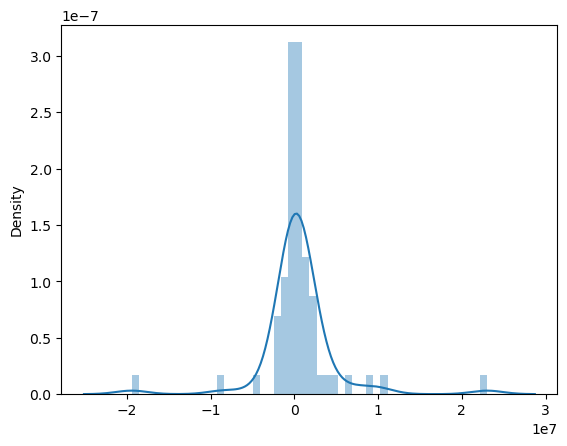

In [28]:
import seaborn as sns
sns.distplot(y_val-prediction)

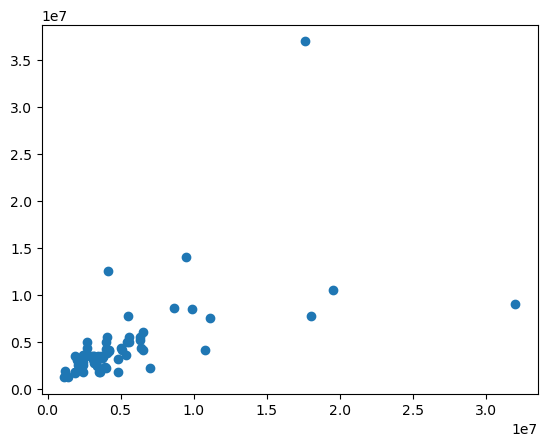

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_val,prediction)

In [30]:
#Hypertunning 

In [31]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

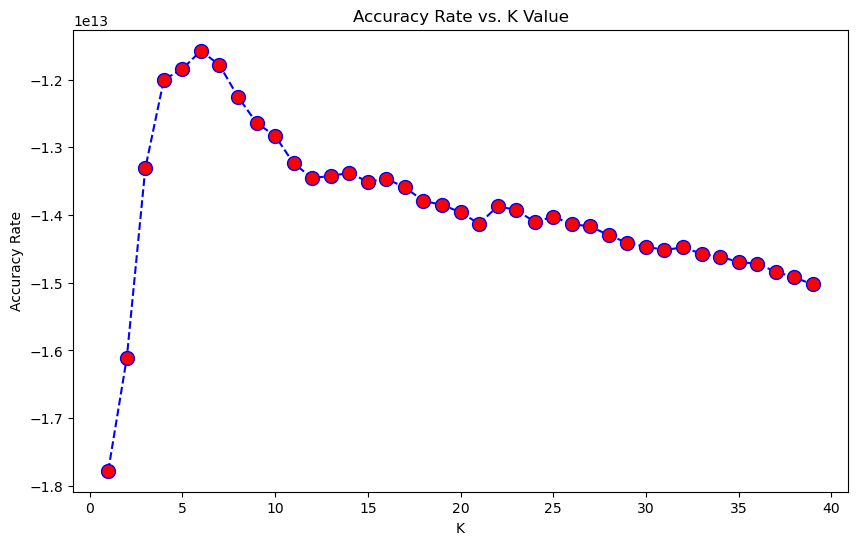

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [33]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_val)
print(predictions)

[ 5500000.  3100000.  3500000.  3000000. 12500000.  5169000.  7700000.
  2200000.  3300000.  4944000.  2700000.  4100000.  2500000.  5500000.
  3000000.  1900000.  3300000.  3100000.  1800000.  1800000.  5000000.
  1800000.  9000000.  2500000.  4100000.  4300000.  3500000.  3100000.
  3401000.  5000000.  1800000.  8504000.  8601000.  7700000.  7500000.
  4100000.  6000000.  3500000.  2400000.  1800000.  4100000.  3000000.
  4221000. 37000000.  2350000. 10500000.  2400000.  2851000.  3432000.
  3801000.  3500000.  5500000.  1250000. 14000000.  3618000.  3000000.
  4361705.  3500000.  3100000.  4300000.  5000000.  3570000.  1199000.
  2200000.  1800000.  1650000.  3500000.  4000000.]


In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 19613477286170.957


In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))

MAE: 2016790.2205882352
MSE: 19613477286170.957
RMSE: 4428710.566990234


# GaussianNB model

In [36]:
from sklearn.naive_bayes import GaussianNB
# Train the model
nb = GaussianNB()
nb.fit(X_train,y_train)

predictions = nb.predict(X_val)
print(predictions)

[ 3401000  3350000  1900000  3000000  4000000  6000000 11500000  3350000
  3350000  6000000  3000000  4000000  2800000  3401000  3350000  1900000
  4100000  4100000  3000000  1800000  4500000  3000000  6000000  3000000
  4100000  1900000  4200000  3100000  3350000  4500000  1800000 11500000
  4000000  4000000  6200000  4100000  6000000  3350000  3000000  1800000
  4100000  3000000  1800000  5000000  2800000 10500000  3401000  1900000
  1900000  3100000  1900000  4200000  3500000 14000000  1900000  3000000
  4361705  3350000  3350000  1800000  2300000  4000000  3400000  2200000
  3000000  3100000  3350000  4100000]


In [37]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_val, predictions)

# Print the accuracy score
print("Accuracy Score:", accuracy)

Accuracy Score: 0.014705882352941176


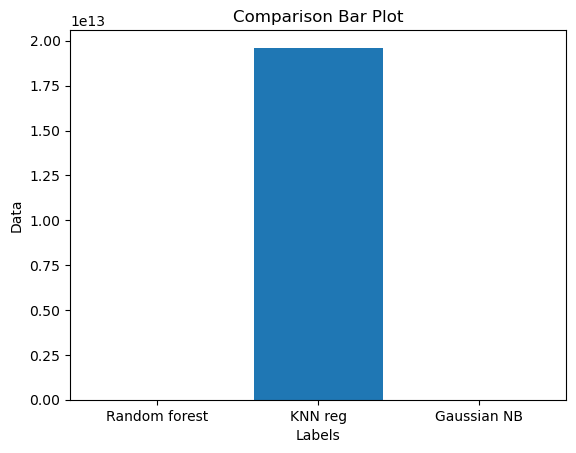

In [38]:
import matplotlib.pyplot as plt

def comparison_bar_plot(data, labels, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    ax.bar(labels, data)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

data = [acc,mse,accuracy]
labels = ['Random forest', 'KNN reg', 'Gaussian NB']
title = 'Comparison Bar Plot'
xlabel = 'Labels'
ylabel = 'Data'

comparison_bar_plot(data, labels, title, xlabel, ylabel)


In [39]:
filename = 'vadodara_house_model.pkl'

In [40]:
pickle.dump(regressor, open(filename, 'wb'))

In [41]:
loaded_model = pickle.load(open(filename, 'rb'))

In [42]:
accuracy = loaded_model.score(X_val, y_val)

In [43]:
print(accuracy*100, '%')

17.58515013741333 %


In [44]:
predictions = loaded_model.predict(X_val)

In [45]:
predictions

array([ 5500000.,  3100000.,  3500000.,  3000000., 12500000.,  5169000.,
        7700000.,  2200000.,  3300000.,  4944000.,  2700000.,  4100000.,
        2500000.,  5500000.,  3000000.,  1900000.,  3300000.,  3100000.,
        1800000.,  1800000.,  5000000.,  1800000.,  9000000.,  2500000.,
        4100000.,  4300000.,  3500000.,  3100000.,  3401000.,  5000000.,
        1800000.,  8504000.,  8601000.,  7700000.,  7500000.,  4100000.,
        6000000.,  3500000.,  2400000.,  1800000.,  4100000.,  3000000.,
        4221000., 37000000.,  2350000., 10500000.,  2400000.,  2851000.,
        3432000.,  3801000.,  3500000.,  5500000.,  1250000., 14000000.,
        3618000.,  3000000.,  4361705.,  3500000.,  3100000.,  4300000.,
        5000000.,  3570000.,  1199000.,  2200000.,  1800000.,  1650000.,
        3500000.,  4000000.])